In [1]:
%matplotlib inline
import itertools

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.transforms as mtransforms
from matplotlib import rcParams

import themepy
theme = themepy.Theme('paper')

import intro_plots as ip

rcParams['figure.dpi'] = 200
rcParams['font.family'] = 'Segoe Print'

In [2]:
fc = '#FEF7F9'
ec = '#f2f8fa'
ecolor = '#248EA6'
fcolor = '#E30B5C'
kcolor = '#021859'
scolor='C1'
pcolor = 'darkgray'
tcolor = 'dimgray'
acolor = 'C4'
posc='#4A73A8'

In [3]:
E = ['temp', 'prcp', 'name']
V = ['x', 'y', 'color']
mosaic = [['E', 'V', 'V*', 'H'], 
          ['.', 'K', 'S', '.']]

In [4]:
artist = False
section = False
visual = False
continuity = False

In [34]:
def make_figure(sout, artist=False, section=False, visual=False, continuity=False, label=None):
    label = [] if label is None else label
    
    fig, axd = plt.subplot_mosaic(mosaic, figsize=(11,5), facecolor='white', gridspec_kw={'height_ratios':[1,1]})
    for n in axd.keys():
        if n not in ['H']:
            axd[n].set_aspect('equal')
            axd[n].set(xlim=(0,1), ylim=(0,1))
            axd[n].axis('off')


    
        w = h = .25
        x = .5
        axsub = {}
        for (n, C) in [('E',E), ('V', V)]:
            if not visual and n=='V':
                continue
            y = .6
            for c in C: 
                axsub[c] = axd[n].inset_axes([x,y,w,h], transform=axd[n].transData)
                #axsub[c].set_aspect("equal")
                if c in ['temp', 'prcp', 'name']:
                    axsub[c].set_ylabel(c, fontsize=14, rotation=0, labelpad=15, ha='right', va='center')
                axsub[c].set(xticks=[], yticks=[])
                y-=w

        for (n, val) in [('temp', '61'), ('prcp', '0.47'), ('name', 'LGA')]:
            axsub[n].text(.5, .5, val, transform=axsub[n].transAxes, ha='center', va='center')
        
        def vval(axes):
            axes['x'].axvline(.35, color=posc, lw=3)
            axes['y'].axhline(.6, color=posc, lw=3)
            axes['color'].set_facecolor(ip.cdict['NEW YORK LAGUARDIA AP'])
        
        if visual:
            vval(axsub)
        
        if visual and 'V*' in label:
            #fewer but bigger
            wm=hm=.15
            axsubp = [(-.1, .6), (.1, .4), (.3, .7), (.5, .5)]
            for (xm, ym) in axsubp:
                    axv = {}
                    for c in V:
                        axv[c] = axd['V*'].inset_axes([xm,ym,wm,hm], transform=axd['V*'].transData)
                        axv[c].set(xticks=[], yticks=[])
                        ym-=hm
                    vval(axv)

    axd['H'].scatter(49, .74, c=ip.cdict['NEW YORK LAGUARDIA AP'],
                     ec='k', s=250, zorder=5, label='LGA')
    if visual:
        axd['H'].axvline(49, lw=5, color=posc, alpha=.25)
        axd['H'].axhline(.74, lw=5, color=posc, alpha=.25)
    axd['H'].set(xlim=(25, 100), ylim=(0, 1.25), facecolor='white')
    axd['H'].set_xlabel('temp', loc='right')
    axd['H'].set_ylabel('prcp', loc='top')
    axd['H'].legend(facecolor='white', markerscale=.5)

    if continuity:
        axd['K'].scatter(.625, .5, s=20, c=kcolor)
        axd['S'].scatter(.325, .5, s=1000, lw=2, facecolor=scolor, edgecolor=kcolor)
        if ['K'] in label:
            axd['K'].text(.625, .2, r'k$\in$K', fontsize=16, 
                          color=kcolor, ha='center', va='bottom')
        if ['S'] in label:
            axd['S'].text(.325, .2, r'$S_k$',
                          color=kcolor, fontsize=16, ha='center', va='bottom')

    if section:
        for n,x in [('E', .225), ('V', .425), ('V*', .575), ('H',.8)]:
            if n in label:
                fig.text(x, .875, n,color=ecolor, fontsize=16, ha='center', va='bottom')

    font_kw = {'fontsize':14, 'fontweight':'bold', 'va':'center', 'ha':'center'}
    bbox = {'facecolor':'white', 'edgecolor':'white','pad':.02}
    if artist:
        for src, dest in [('temp', 'x'), ('prcp', 'y'), ('name', 'color')]:
            nu = mpatches.ConnectionPatch(xyA=(1.1, .5), coordsA=axsub[src].transData, 
                                          xyB=(0, .5), coordsB=axsub[dest].transData, 
                                           mutation_scale=25, arrowstyle='-|>', lw=4, color=acolor)      
            fig.add_artist(nu)
        x = -2.15
        y = .8
        fig.text(x, y, r'$\nu_{x}$',  color=acolor, **font_kw, transform=axsub['x'].transData) 
        fig.text(x, y, r'$\nu_{y}$', color=acolor, **font_kw, transform=axsub['y'].transData)      
        fig.text(x, y, r'$\nu_{color}$',  color=acolor, **font_kw, transform=axsub['color'].transData)
        

        if 'V*' in label:
            q1 = mpatches.ConnectionPatch(xyA=(-.5, .5), coordsA=axd['H'].transAxes, 
                                              xyB=(42, .74), coordsB=axd['H'].transData, 
                                              arrowstyle=']-,widthA=2.25,lengthA=.5', 
                                           mutation_scale=25, lw=5, color=acolor)      
            fig.add_artist(q1)

            q2 = mpatches.ConnectionPatch(xyA=(-.5, .5), coordsA=axd['H'].transAxes, 
                                              xyB=(44, .74), coordsB=axd['H'].transData, 
                                               mutation_scale=25, arrowstyle='-|>', lw=5, color=acolor)      
            fig.add_artist(q2)

            fig.text(-.35, .6, r'$Q$',color=acolor, **font_kw, transform=axd['H'].transAxes)


            xi1 = mpatches.ConnectionPatch(xyA=(-.15, .5), coordsA=axd['V*'].transAxes, 
                                              xyB=(.75, .5), coordsB=axd['V'].transAxes, 
                                               mutation_scale=25, arrowstyle='-|>', lw=5, color=acolor)      
            fig.add_artist(xi1)

            fig.text(-.25, .6, r'$\xi^*$', color=acolor, **font_kw, transform=axd['V*'].transAxes)
        elif 'V' in label:
            qh1 = mpatches.ConnectionPatch(xyA=(.85, .5), coordsA=axd['V'].transAxes, 
                                              xyB=(42, .74), coordsB=axd['H'].transData, 
                                              arrowstyle=']-,widthA=2.25,lengthA=.5', 
                                           mutation_scale=25, lw=5, color=acolor)      
            fig.add_artist(qh1)

            qh2 = mpatches.ConnectionPatch(xyA=(.85, .5), coordsA=axd['V'].transAxes, 
                                              xyB=(44, .74), coordsB=axd['H'].transData, 
                                               mutation_scale=25, arrowstyle='-|>', lw=5, color=acolor)      
            fig.add_artist(qh2)
    
            fig.text(1.5, .65, r'$\hat{Q}$', color=acolor, **font_kw, transform=axd['V'].transAxes)
            
        xi2 = mpatches.ConnectionPatch(xyA=(.15, .5), coordsA=axd['S'].transAxes, 
                                          xyB=(.65, .5), coordsB=axd['K'].transAxes, 
                                           mutation_scale=25, arrowstyle='-|>', lw=5, color=acolor)      
        fig.add_artist(xi2) 
        fig.text(-.2, .6, r'$\xi$', color=acolor, **font_kw, transform=axd['S'].transAxes)

    if section:
        tfont_kw = {'fontsize':12, 'fontweight':'bold', 'va':'center', 'ha':'center'}

        for n in ['E', 'V']:
            if n in label:
                tau = mpatches.ConnectionPatch(xyA=(.625, .5), coordsA=axd['K'].transAxes, 
                                              xyB=(.625, .075), coordsB=axd[n].transAxes, 
                                              arrowstyle='->', mutation_scale=15,
                                               lw=2, linestyle='--', color=tcolor) 
                fig.add_artist(tau)

        if 'E' in label:
            fig.text(-.15, .88, r'$\tau$', color=tcolor, **tfont_kw, transform=axd['K'].transAxes)
        if 'V' in label:
            fig.text(.69, .95, r'$\mu$', color=tcolor, **tfont_kw, transform=axd['K'].transAxes)

        if 'H' in label:
            rho = mpatches.ConnectionPatch(xyA=(.425, .625), coordsA=axd['S'].transAxes, 
                                              xyB=(46, .68), coordsB=axd['H'].transData, 
                                              arrowstyle='->', mutation_scale=15, 
                                               lw=2, linestyle='--', color=tcolor) 
            fig.add_artist(rho)
            fig.text(.78, .88, r'$\rho$', color=tcolor, **tfont_kw, transform=axd['S'].transAxes)

        if 'V*' in label:
            for dest in axsubp:
                xd, yd = dest[0]+wm/2, dest[1]-2*wm 
                mus = mpatches.ConnectionPatch(xyA=(.425, .625), coordsA=axd['S'].transAxes, 
                                              xyB=(xd,yd), coordsB=axd['V*'].transData, 
                                              arrowstyle='->', mutation_scale=15, 
                                               lw=1.5, linestyle='--', color=tcolor) 
                fig.add_artist(mus)

            fig.text(.325, 1.175, r'$\mu*$', color=tcolor, **tfont_kw, transform=axd['S'].transAxes)
    fig.savefig(f"{sout}.png", facecolor='white', bbox_inches='tight')
    plt.show()

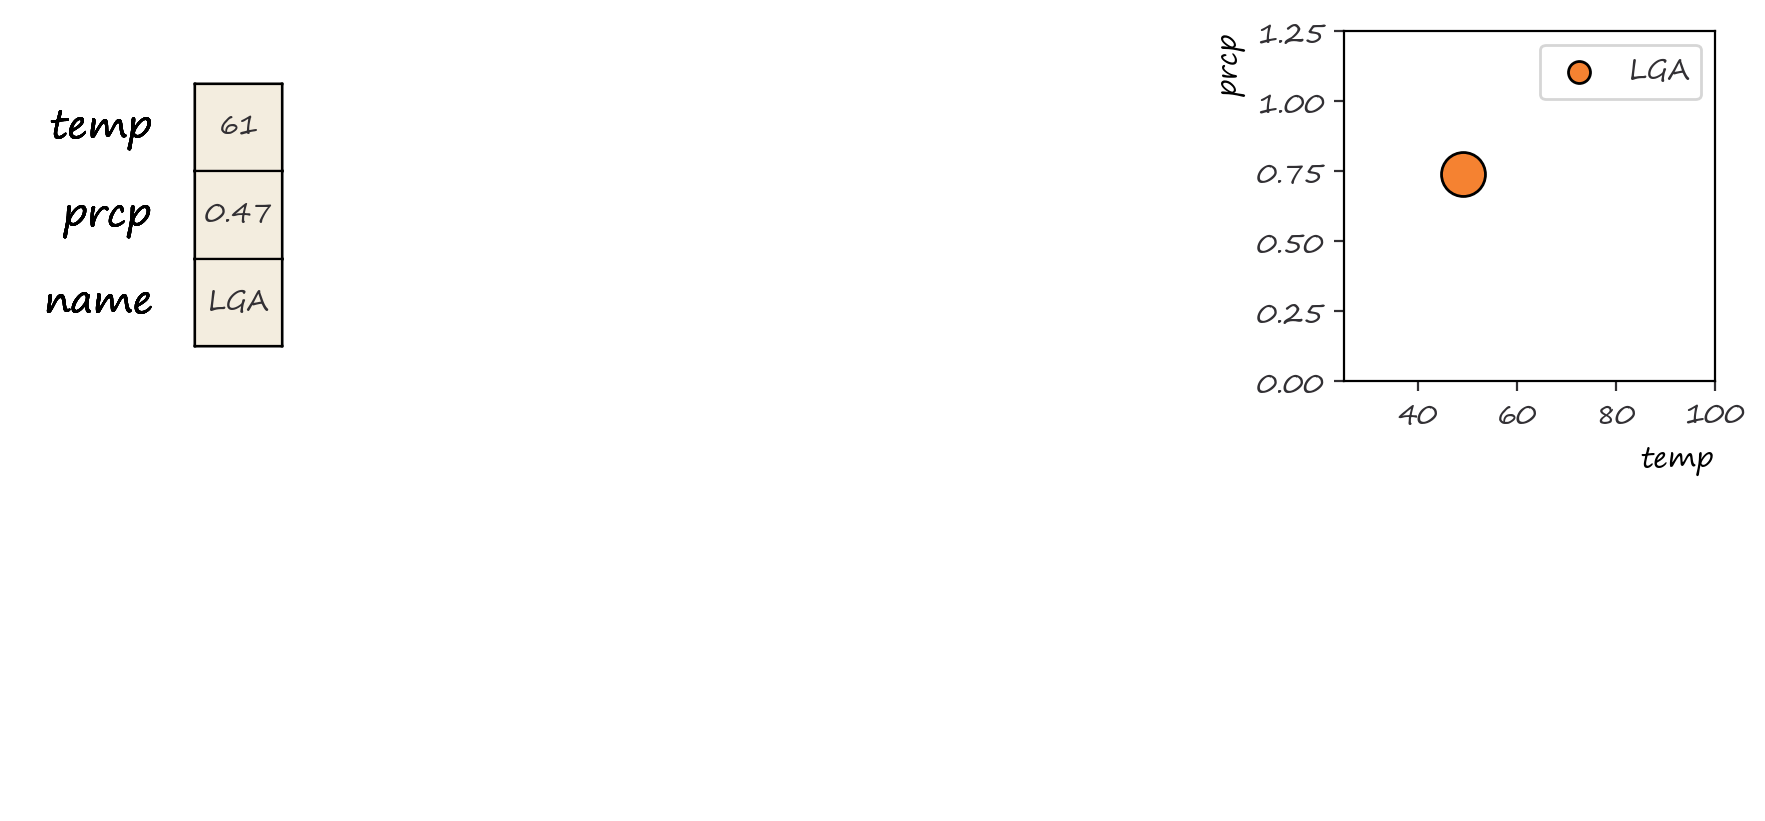

In [35]:
 make_figure("math01", artist=False, section=False, visual=False, continuity=False, label=None)

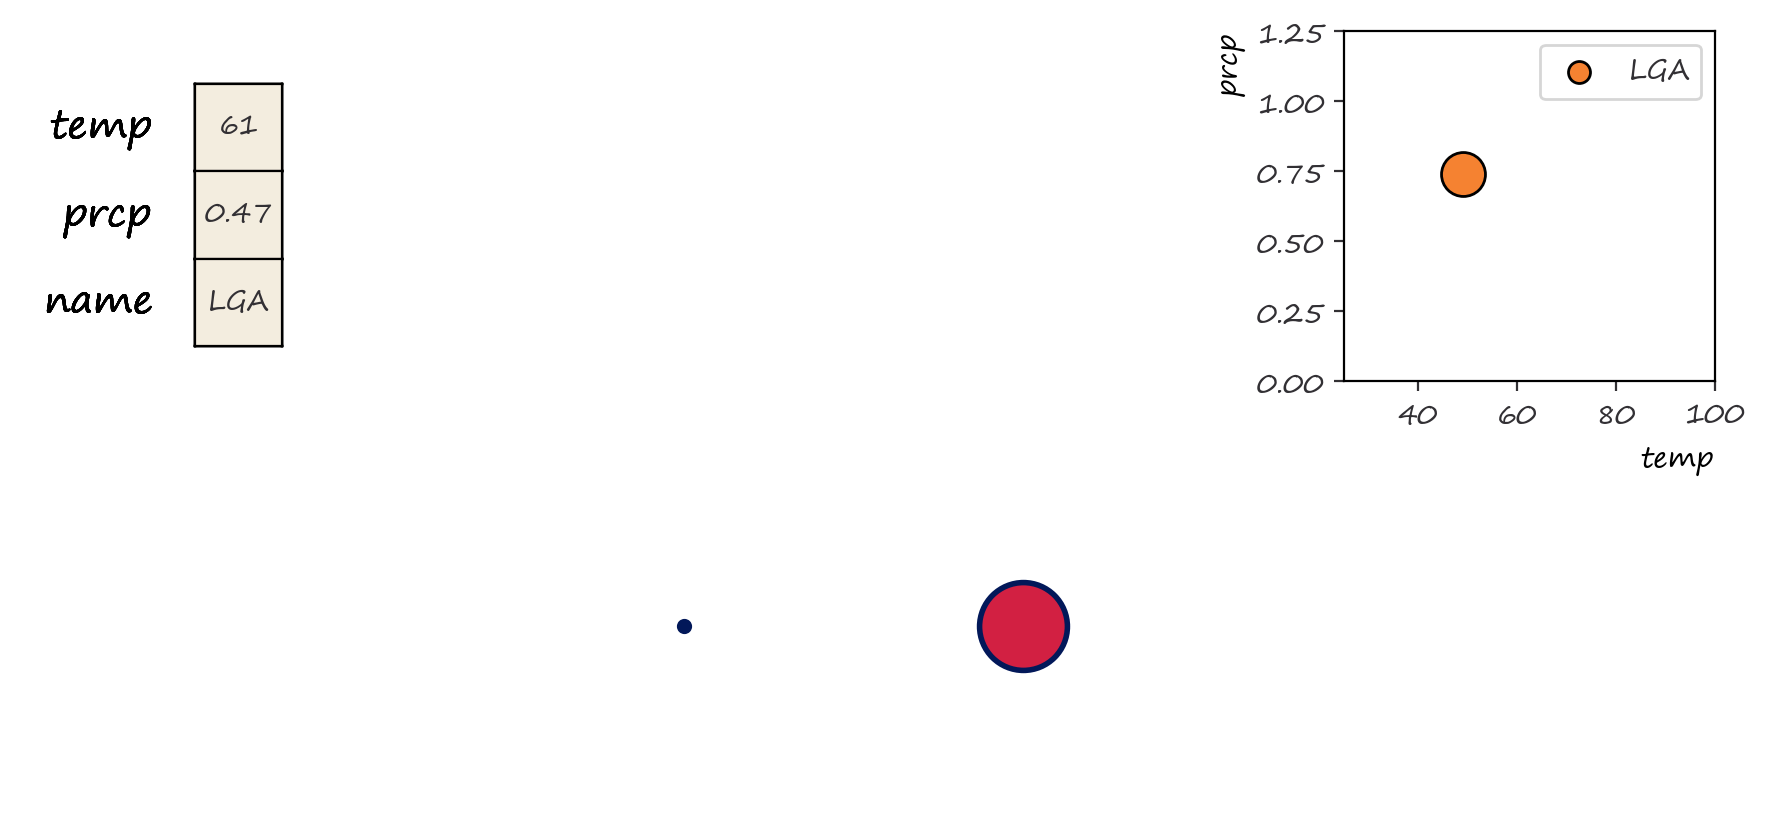

In [36]:
 make_figure("math02", artist=False, section=False, visual=False, continuity=True, label=None)

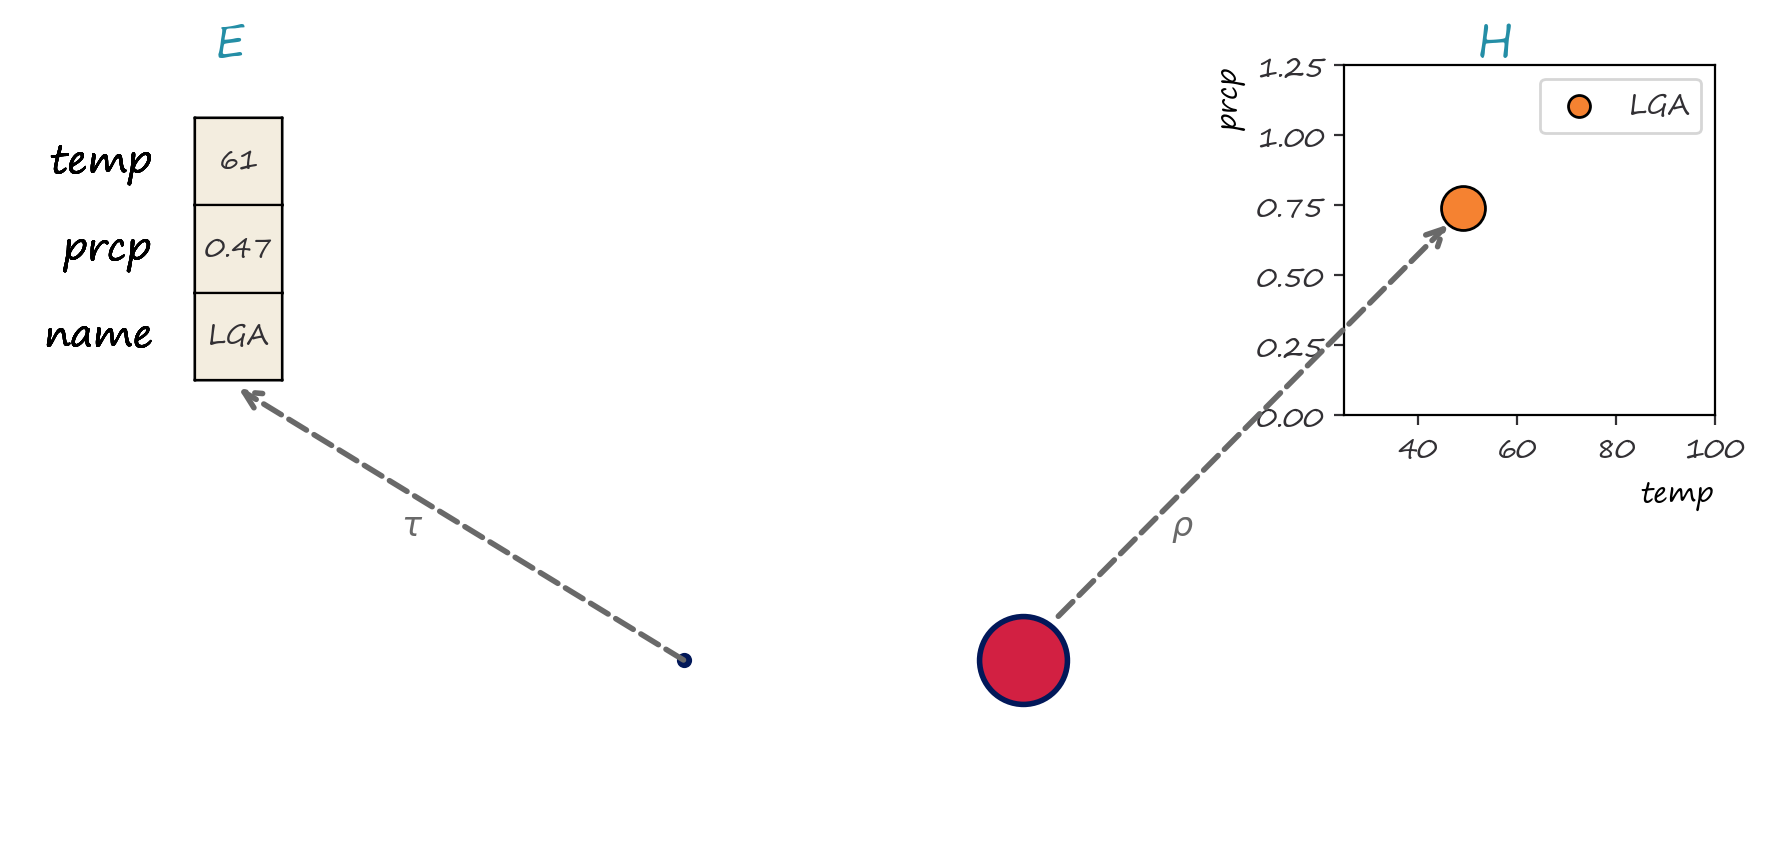

In [37]:
 make_figure("math03", artist=False, section=True, visual=False, continuity=True, label=['E', 'H'])

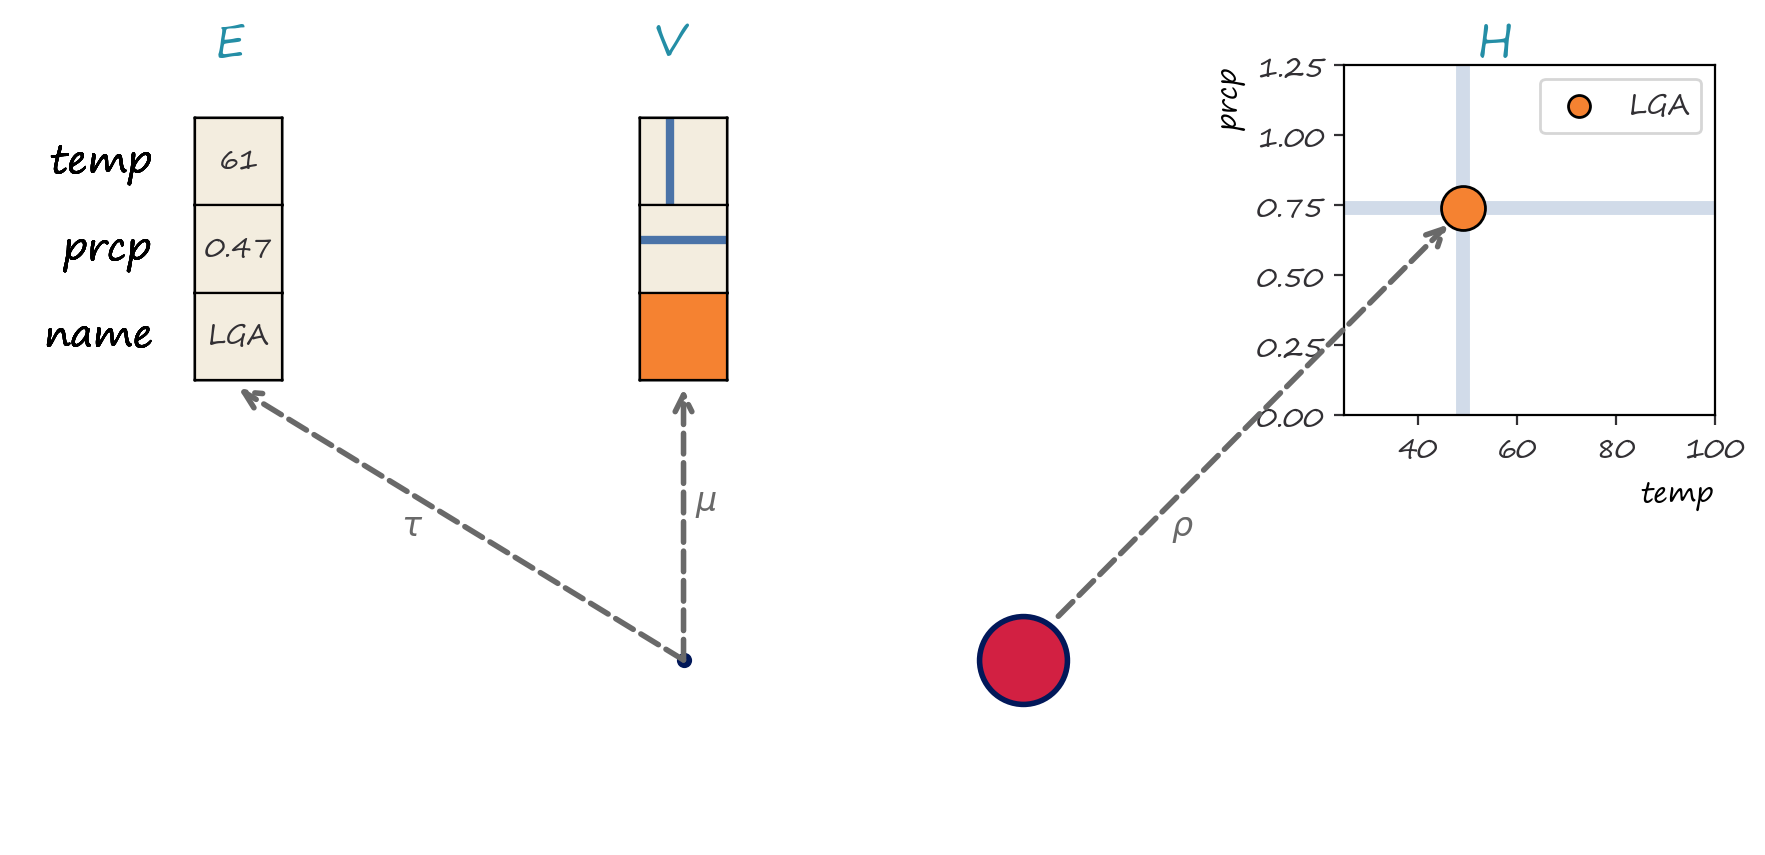

In [38]:
 make_figure("math04", artist=False, section=True, visual=True, continuity=True, label=['E', 'V', 'H'])

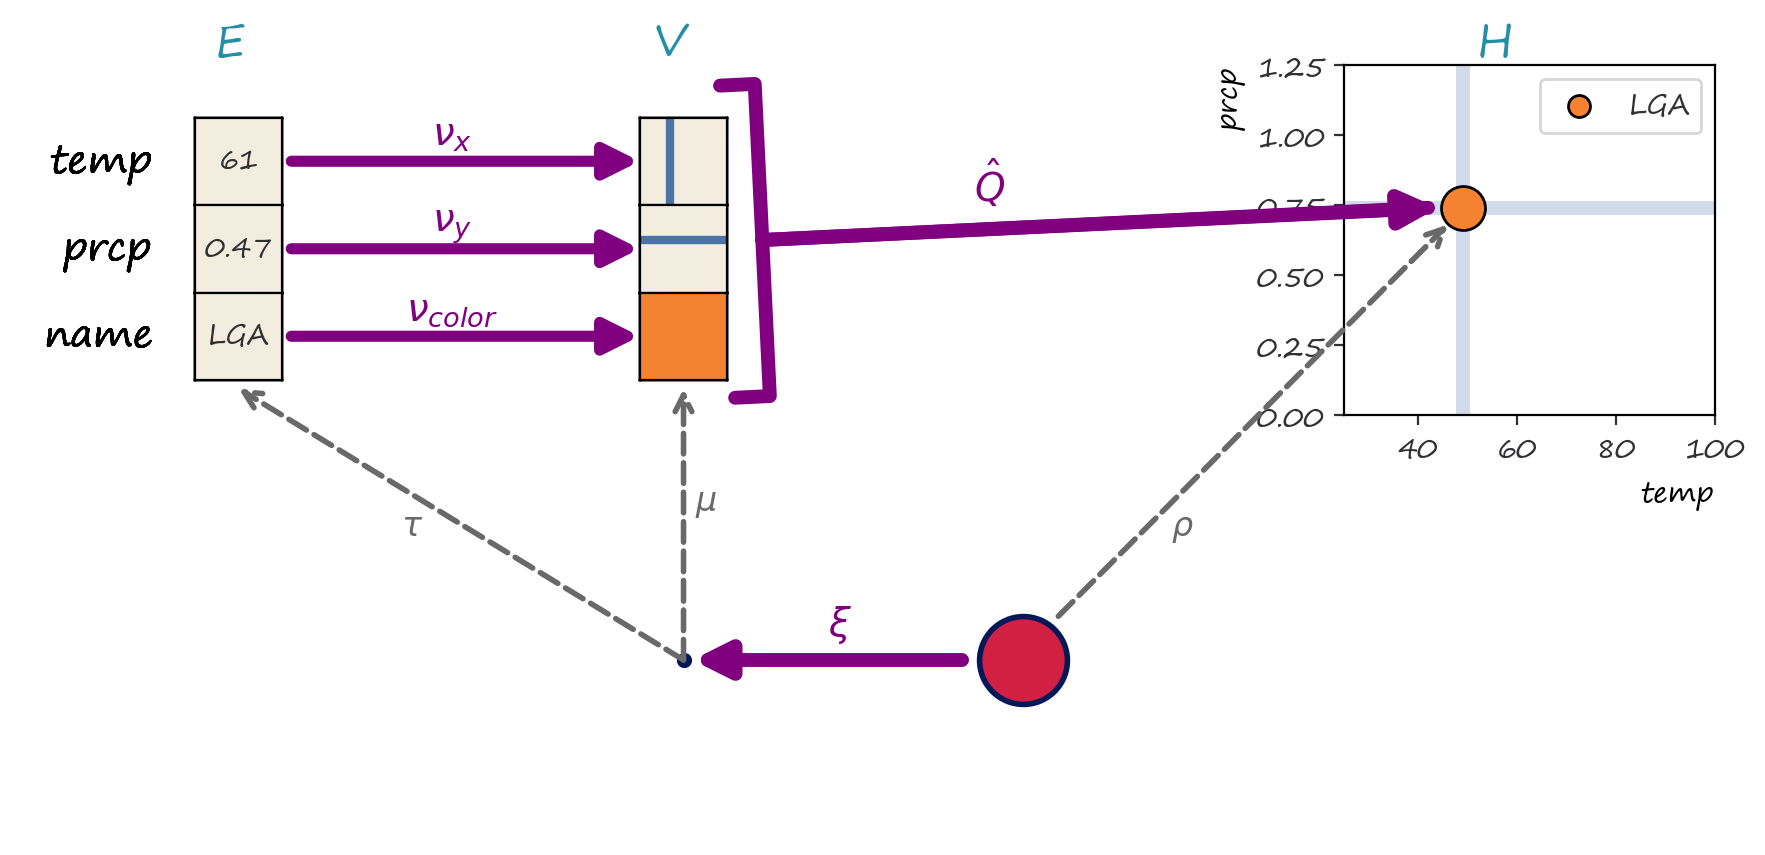

In [39]:
 make_figure("math05", artist=True, section=True, visual=True, continuity=True, label=['E', 'V', 'H'])

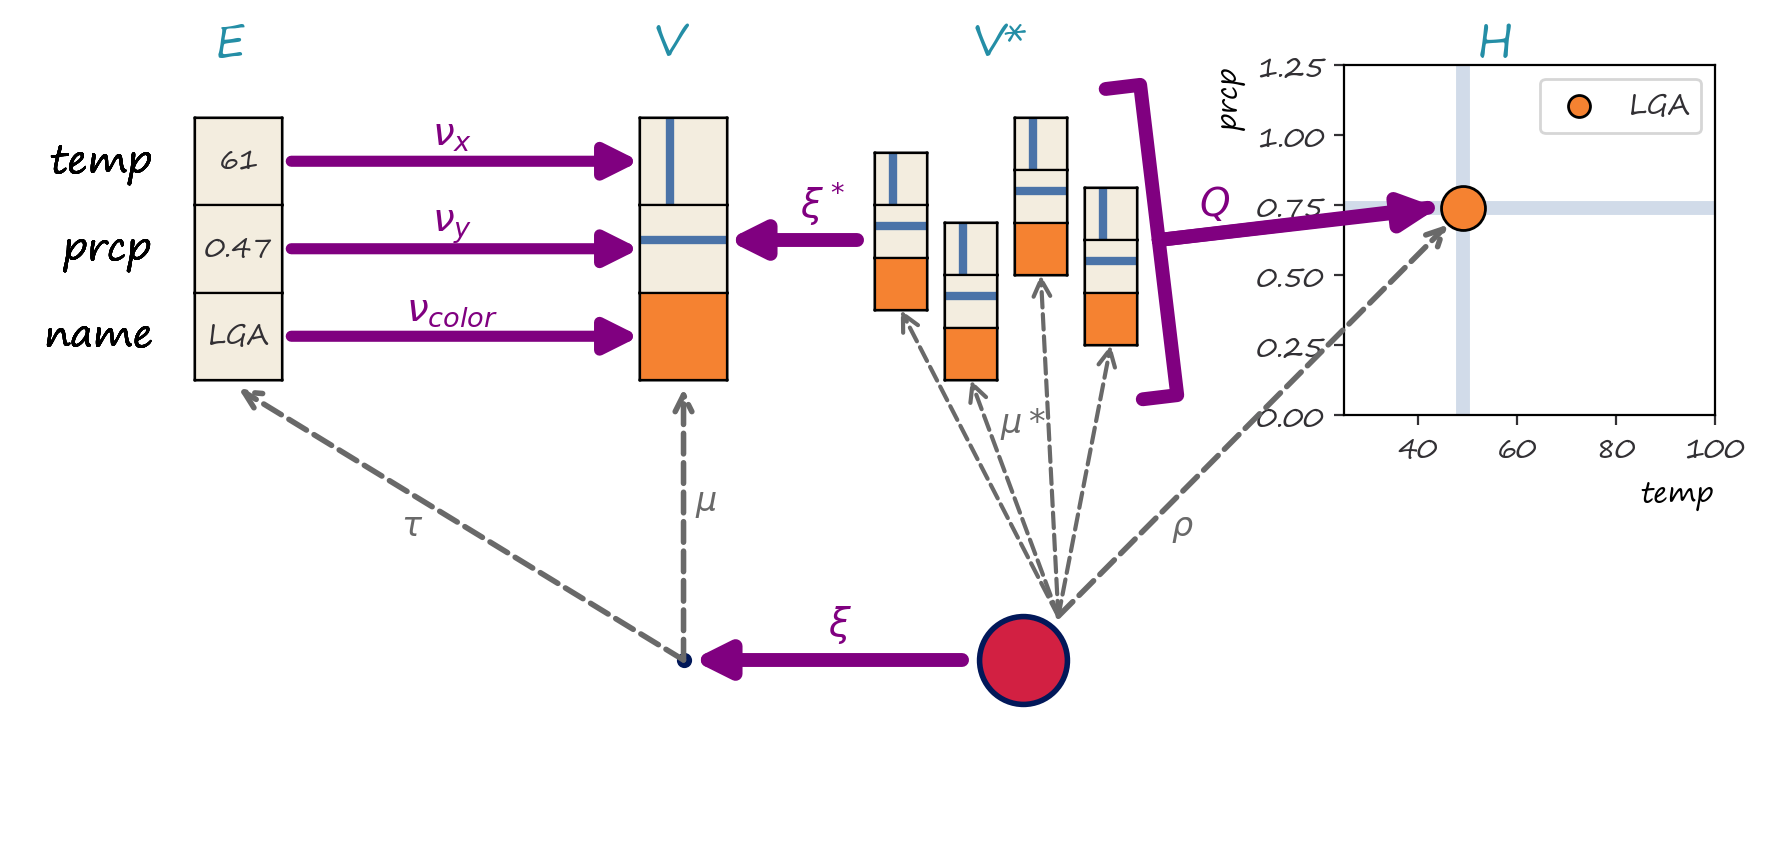

In [40]:
 make_figure("math06", artist=True, section=True, visual=True, continuity=True, label=['E', 'V', 'V*', 'H'])